# 0 Load dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!nvidia-smi

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Wed Nov 23 10:30:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    13W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+------

In [2]:
PROJECT_path = '/content/drive/MyDrive/IDB_diamond_damage'

In [3]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image

## 0.1 [A] 65-class classification

In [4]:
def load_dataset(dataset_path):
  image_list = []
  label_list = []
  class_list = []
  image_num = 0
  tag = 0
  n = 0
  category_names = os.listdir(dataset_path)
  category_num = len(category_names)
  category_names.sort()
  for category in category_names:
    n += 1
    if n<10:
      class_n = "(0"+str(n)+")"
    else:
      class_n = "("+str(n)+")"
    class_list.append(class_n)
    category_path = os.path.join(dataset_path, category)
    file_names = os.listdir(category_path)
    file_nums = len(file_names)
    file_names.sort()
    print("class No. "+class_n+"; category: "+str(category)+"; image num: ", file_nums, end=" ")
    image_num += file_nums
    for file in tqdm(file_names):
      file_path = os.path.join(category_path, file)
      image = Image.open(file_path)
      img = np.asarray(image,dtype="float32")

      #chose wheather to crop the images, e.g., 1024*1024
      img = img[0:1024, 0:1024]
      
      img = img[:, :, np.newaxis] 
      image_list.append(img)
      label_list.append(tag)
    tag += 1
  return image_list, label_list, category_num, class_list, image_num

## 0.1 [B] 3-class classification

In [5]:
# def load_dataset(dataset_path):
#   image_list = []
#   label_list = []
#   class_list = ["original group", "heating group", "sintering group"]
#   image_num = 0
#   n = 0
#   category_names = os.listdir(dataset_path)
#   category_num = len(category_names)
#   category_names.sort()
#   for category in category_names:
#     n += 1
#     if n<16:
#       class_n = "original group"
#       tag = 0
#     else:
#       if n<31:
#         class_n = "heating group"
#         tag = 1
#       else:
#         class_n = "sintering group"
#         tag = 2
#     category_path = os.path.join(dataset_path, category)
#     file_names = os.listdir(category_path)
#     file_nums = len(file_names)
#     file_names.sort()
#     print("class "+str(tag)+" "+class_n+"; category: "+str(category)+"; image num: ", file_nums, end=" ")
#     image_num += file_nums
#     for file in tqdm(file_names):
#       file_path = os.path.join(category_path, file)
#       image = Image.open(file_path)
#       img = np.asarray(image,dtype="float32")

#       #chose wheather to crop the images, e.g., 1024*1024
#       img = img[0:1024, 0:1024]
      
#       img = img[:, :, np.newaxis] 
#       image_list.append(img)
#       label_list.append(tag)
#   return image_list, label_list, len(class_list), class_list, image_num

## 0.2 Dataset processing

In [6]:
X_set, Y_set, CLASS_num, CLASS_list, IMG_num = load_dataset(os.path.join(PROJECT_path, 'SEM'))
print("\n")
print("Damage class num = ", CLASS_num)
print("Damage class list: ", CLASS_list)
print("SEM image num = ", IMG_num)

class No. (01); category: 01_25.30_2280_original; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 164.29it/s]


class No. (02); category: 02_30.35_2280_original; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 159.67it/s]


class No. (03); category: 03_35.40_2280_original; image num:  45 

100%|██████████| 45/45 [00:00<00:00, 162.20it/s]


class No. (04); category: 04_40.45_2180_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 171.82it/s]


class No. (05); category: 05_45.50_2190_original; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 174.20it/s]


class No. (06); category: 06_25.30_2280+Ti_original; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 171.89it/s]


class No. (07); category: 07_30.35_2280+Ti_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 165.97it/s]


class No. (08); category: 08_35.40_2280+Ti_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 175.11it/s]


class No. (09); category: 09_40.45_2180+Ti_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 167.85it/s]


class No. (10); category: 10_45.50_2180+Ti_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 176.66it/s]


class No. (11); category: 11_40.50_ISD1750_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 170.62it/s]


class No. (12); category: 12_40.50_JS1100_original; image num:  48 

100%|██████████| 48/48 [00:00<00:00, 166.41it/s]


class No. (13); category: 13_50.60_JS1100_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 154.92it/s]


class No. (14); category: 14_60.70_JS1100_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 166.90it/s]


class No. (15); category: 15_70.80_JS1100_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 150.01it/s]


class No. (16); category: 16_25.30_2280_heating; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 165.27it/s]


class No. (17); category: 17_30.35_2280_heating; image num:  44 

100%|██████████| 44/44 [00:00<00:00, 158.63it/s]


class No. (18); category: 18_35.40_2280_heating; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 175.93it/s]


class No. (19); category: 19_40.45_2180_heating; image num:  41 

100%|██████████| 41/41 [00:00<00:00, 156.84it/s]


class No. (20); category: 20_45.50_2190_heating; image num:  44 

100%|██████████| 44/44 [00:00<00:00, 142.14it/s]


class No. (21); category: 21_25.30_2280+Ti_heating; image num:  41 

100%|██████████| 41/41 [00:00<00:00, 165.65it/s]


class No. (22); category: 22_30.35_2280+Ti_heating; image num:  48 

100%|██████████| 48/48 [00:00<00:00, 175.45it/s]


class No. (23); category: 23_35.40_2280+Ti_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 154.07it/s]


class No. (24); category: 24_40.45_2180+Ti_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 132.95it/s]


class No. (25); category: 25_45.50_2180+Ti_heating; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 131.29it/s]


class No. (26); category: 26_40.50_ISD1750_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 94.27it/s]


class No. (27); category: 27_40.50_JS1100_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 87.55it/s]


class No. (28); category: 28_50.60_JS1100_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 93.20it/s]


class No. (29); category: 29_60.70_JS1100_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 120.03it/s]


class No. (30); category: 30_70.80_JS1100_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 134.71it/s]


class No. (31); category: 31_25.30_2280_sintering; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 151.62it/s]


class No. (32); category: 32_30.35_2280_sintering; image num:  44 

100%|██████████| 44/44 [00:00<00:00, 132.24it/s]


class No. (33); category: 33_35.40_2280_sintering; image num:  41 

100%|██████████| 41/41 [00:00<00:00, 104.27it/s]


class No. (34); category: 34_40.45_2180_sintering; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 120.81it/s]


class No. (35); category: 35_40.45_2190_sintering; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 151.41it/s]


class No. (36); category: 36_50.60_JS1100_20200701T.1; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 146.37it/s]


class No. (37); category: 37_50.60_JS1100_20200701T.2; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 118.59it/s]


class No. (38); category: 38_50.60_JS1100_20200701T.3; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 131.55it/s]


class No. (39); category: 39_50.60_JS1100_20200710T1.1; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 105.33it/s]


class No. (40); category: 40_50.60_JS1100_20200710T1.2; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 141.86it/s]


class No. (41); category: 41_50.60_JS1100_20200710T1.3; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 123.02it/s]


class No. (42); category: 42_50.60_JS1100_20200710T2.1; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 137.46it/s]


class No. (43); category: 43_50.60_JS1100_20200710T2.2; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 118.80it/s]


class No. (44); category: 44_50.60_JS1100_20200710T2.3; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 146.19it/s]


class No. (45); category: 45_50.60_JS1100_20200713T0.1; image num:  88 

100%|██████████| 88/88 [00:00<00:00, 186.70it/s]


class No. (46); category: 46_50.60_JS1100_20200713T0.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 194.65it/s]


class No. (47); category: 47_50.60_JS1100_20200713T0.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 191.58it/s]


class No. (48); category: 48_50.60_JS1100_20200713T1.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 188.41it/s]


class No. (49); category: 49_50.60_JS1100_20200713T1.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 176.81it/s]


class No. (50); category: 50_50.60_JS1100_20200713T1.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 170.74it/s]


class No. (51); category: 51_50.60_JS1100_20200713T2.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 173.49it/s]


class No. (52); category: 52_50.60_JS1100_20200713T2.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 167.45it/s]


class No. (53); category: 53_50.60_JS1100_20200713T2.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 153.47it/s]


class No. (54); category: 54_50.60_JS1100_20200713T3.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 148.34it/s]


class No. (55); category: 55_50.60_JS1100_20200713T3.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 158.03it/s]


class No. (56); category: 56_50.60_JS1100_20200713T3.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 184.29it/s]


class No. (57); category: 57_50.60_JS1100_20200714T1.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 192.91it/s]


class No. (58); category: 58_50.60_JS1100_20200714T1.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 196.63it/s]


class No. (59); category: 59_50.60_JS1100_20200714T1.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 202.47it/s]


class No. (60); category: 60_50.60_JS1100_20200714T2.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 196.84it/s]


class No. (61); category: 61_50.60_JS1100_20200714T2.2; image num:  47 

100%|██████████| 47/47 [00:00<00:00, 188.17it/s]


class No. (62); category: 62_50.60_JS1100_20200714T2.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 184.61it/s]


class No. (63); category: 63_50.60_JS1100_20200714T3.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 159.42it/s]


class No. (64); category: 64_50.60_JS1100_20200714T3.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 161.02it/s]


class No. (65); category: 65_50.60_JS1100_20200714T3.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 155.48it/s]



Damage class num =  65
Damage class list:  ['(01)', '(02)', '(03)', '(04)', '(05)', '(06)', '(07)', '(08)', '(09)', '(10)', '(11)', '(12)', '(13)', '(14)', '(15)', '(16)', '(17)', '(18)', '(19)', '(20)', '(21)', '(22)', '(23)', '(24)', '(25)', '(26)', '(27)', '(28)', '(29)', '(30)', '(31)', '(32)', '(33)', '(34)', '(35)', '(36)', '(37)', '(38)', '(39)', '(40)', '(41)', '(42)', '(43)', '(44)', '(45)', '(46)', '(47)', '(48)', '(49)', '(50)', '(51)', '(52)', '(53)', '(54)', '(55)', '(56)', '(57)', '(58)', '(59)', '(60)', '(61)', '(62)', '(63)', '(64)', '(65)']
SEM image num =  2870


# 1 Dataset processing

In [7]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [8]:
def classification_dataset_process(X_set, Y_set):
  
  # choose the size to convert, e.g., 224*224
  X_set = [cv2.cvtColor(cv2.resize(i, (224, 224)), cv2.COLOR_GRAY2RGB) for i in X_set]

  X_set = np.asarray(X_set)
  X_set = X_set.astype('float32')
  X_set /= 255.0
  Y_set = tf.keras.utils.to_categorical(Y_set, CLASS_num)
  return X_set, Y_set

In [9]:
X_set, Y_set = classification_dataset_process(X_set, Y_set)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_set,Y_set,test_size = 0.25, random_state = 888)

In [11]:
print(X_train.shape)
print(Y_train)
print(X_test.shape)
print(Y_test)

(2152, 224, 224, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(718, 224, 224, 3)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 2 Grad-CAM algorithms

In [12]:
import os
import cv2
import heapq
import keras
import tensorflow as tf
import numpy as np
import tensorflow.keras.backend as K
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.vgg16 import (VGG16, preprocess_input, decode_predictions)
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.python.framework import ops
tf.compat.v1.disable_eager_execution()

In [13]:
model_path = "/content/drive/MyDrive/IDB_diamond_damage/saved_models/classification_model.h5"
model = load_model(model_path)

In [14]:
def register_gradient():
    if "GuidedBackProp" not in ops._gradient_registry._registry:
        @ops.RegisterGradient("GuidedBackProp")
        def _GuidedBackProp(op, grad):
            dtype = op.inputs[0].dtype
            return grad * tf.cast(grad > 0., dtype) * tf.cast(op.inputs[0] > 0., dtype)

def compile_saliency_function(model, activation_layer='block5_conv3'):
    input_img = model.input
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
    layer_output = layer_dict[activation_layer].output
    max_output = K.max(layer_output, axis=3)
    saliency = K.gradients(K.sum(max_output), input_img)[0]
    return K.function([input_img, K.learning_phase()], [saliency])

def modify_backprop(model, name):
    g = tf.compat.v1.get_default_graph()
    with g.gradient_override_map({'Relu': name}):
        layer_dict = [layer for layer in model.layers[1:]
                      if hasattr(layer, 'activation')]
        for layer in layer_dict:
            if layer.activation == keras.activations.relu:
                layer.activation = tf.nn.relu
        new_model = load_model(model_path)
    return new_model

def deprocess_image(x):
    '''
    Same normalization as in:
    https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py
    '''
    if np.ndim(x) > 3:
        x = np.squeeze(x)
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def _compute_gradients(tensor, var_list):
    with tf.GradientTape() as gtape:
        grads = gtape.gradient(tensor, var_list)
        return [grad if grad is not None else tf.zeros_like(var) for var, grad in zip(var_list, grads)]

def load_image(path):
    img_path = path
    img = cv2.imread(img_path)
    img = img[0:1024][0:1024]
    img= cv2.resize(img,(224,224),interpolation=cv2.INTER_NEAREST)
    x = img
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def doCAM(image_path, image_code, dirs1):
  preprocessed_input = load_image(image_path)
  register_gradient()
  guided_model = modify_backprop(model, 'GuidedBackProp')
  saliency_fn = compile_saliency_function(guided_model)
  saliency = saliency_fn([preprocessed_input, 0])
  gradcam = saliency[0].transpose(1, 2, 3, 0)
  a = np.squeeze(gradcam)
  cv2_imshow(deprocess_image(a))
  cv2.imwrite(dirs1+"/Guided_BP_"+image_code+".jpg", deprocess_image(a))
  pred = model.predict(preprocessed_input)
  print(np.argmax(pred))
  top1_idx, top2_idx, top3_idx= heapq.nlargest(3, range(len(pred[0])), pred[0].take)
  class_output = model.output[:, top1_idx]
  last_conv_layer = model.get_layer("block5_pool")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([preprocessed_input])
  for i in range(512):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  img = cv2.imread(image_path)
  img = img[0:1024][0:1024]
  img= cv2.resize(img,(224,224),interpolation=cv2.INTER_NEAREST)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  cv2_imshow(heatmap)
  cv2.imwrite(dirs1+"/Heatmap_"+image_code+".jpg", heatmap)
  heatmap2color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  grd_CAM = cv2.addWeighted(img, 0.6, heatmap2color, 0.4, 0)
  cv2_imshow(grd_CAM)
  cv2.imwrite(dirs1+"/Grd-CAM_"+image_code+".jpg", grd_CAM)
  heatmap =cv2.imread(dirs1+"/Heatmap_"+image_code+".jpg")
  guided_CAM = saliency[0].transpose(1, 2, 3, 0) * heatmap[..., np.newaxis]
  guided_CAM = deprocess_image(guided_CAM)
  cv2_imshow(guided_CAM)
  cv2.imwrite(dirs1+"/Guided-CAM_"+image_code+".jpg", guided_CAM)

# 2 Feature visulization

In [15]:
from keras.models import Model

In [16]:
Y_set_pred=model.predict(X_set)
print(Y_set_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[4.19786721e-01 5.60043938e-02 5.63327812e-05 ... 5.11890486e-09
  2.60673046e-11 8.21856689e-13]
 [2.22918630e-01 7.74668157e-02 4.07153189e-01 ... 6.03651117e-15
  3.97858785e-20 6.76771785e-23]
 [2.84184605e-01 4.78459030e-01 2.03841832e-02 ... 4.50853086e-16
  1.08483535e-19 2.39465607e-22]
 ...
 [4.35701718e-11 1.60218806e-14 3.95386212e-17 ... 1.54615162e-04
  1.00639716e-01 2.52214987e-02]
 [8.39820088e-11 2.41398990e-15 2.37489443e-17 ... 2.29496654e-05
  6.90514669e-02 7.74432048e-02]
 [3.54016527e-09 1.55893649e-13 6.75390403e-15 ... 1.07262713e-04
  9.12299380e-02 7.95575902e-02]]


In [17]:
Y_set_true_label = []
for i in range(len(Y_set)):
  n = np.argmax(Y_set[i])
  Y_set_true_label.append(n)

In [18]:
Y_set_pred_label = []
for i in range(len(Y_set_pred)):
  n = np.argmax(Y_set_pred[i])
  Y_set_pred_label.append(n)

In [19]:
print(Y_set_true_label)
print(Y_set)
print(Y_set_pred_label)
print(Y_set_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

In [20]:
Y_true_set = []
for i in range(len(Y_set_pred)):
  if Y_set_true_label[i] == Y_set_pred_label[i]:
    Y_true_set.append(i)
print(Y_true_set)
print(len(Y_true_set))

[0, 4, 5, 6, 9, 12, 13, 14, 16, 19, 24, 28, 30, 33, 37, 39, 40, 41, 43, 44, 45, 46, 47, 48, 52, 53, 54, 55, 56, 57, 59, 60, 62, 63, 68, 69, 70, 71, 72, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 139, 143, 144, 146, 155, 158, 159, 160, 161, 164, 166, 168, 169, 172, 174, 176, 177, 179, 183, 187, 188, 191, 196, 201, 203, 205, 209, 214, 217, 219, 221, 222, 223, 225, 226, 227, 228, 229, 232, 233, 235, 236, 238, 241, 244, 245, 246, 247, 248, 249, 250, 251, 253, 254, 256, 258, 259, 260, 263, 264, 265, 267, 268, 269, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 295, 297, 299, 300, 301, 302, 303, 304, 310, 313, 321, 322, 325, 329, 332, 333, 334, 335, 337, 338, 339, 342, 348, 350, 360, 361, 367, 368, 370, 377, 384, 389, 

In [21]:
def load_image_list(dataset_path):
  img_path_list = []
  category_names = os.listdir(dataset_path)
  category_names.sort()
  # print(category_names)
  category_nums = len(category_names)
  images = []
  for category in category_names:
    category_path = os.path.join(dataset_path, category)
    file_names = os.listdir(category_path)
    file_names.sort(key=lambda x:int(x[:-5]))
    # print(file_names)
    file_nums = len(file_names)  
    for file in (file_names):
      img_path = os.path.join(category_path, file)
      img_path_list.append(img_path)
  return img_path_list

In [22]:
image_path_list = load_image_list("/content/drive/MyDrive/IDB_diamond_damage/SEM/")

In [23]:
Y_true_list = []
for i in Y_true_set:
  Y_true_list.append(image_path_list[i])

In [24]:
print(Y_true_list)

['/content/drive/MyDrive/IDB_diamond_damage/SEM/01_25.30_2280_original/1.tiff', '/content/drive/MyDrive/IDB_diamond_damage/SEM/01_25.30_2280_original/5.tiff', '/content/drive/MyDrive/IDB_diamond_damage/SEM/01_25.30_2280_original/6.tiff', '/content/drive/MyDrive/IDB_diamond_damage/SEM/01_25.30_2280_original/7.tiff', '/content/drive/MyDrive/IDB_diamond_damage/SEM/01_25.30_2280_original/10.tiff', '/content/drive/MyDrive/IDB_diamond_damage/SEM/01_25.30_2280_original/13.tiff', '/content/drive/MyDrive/IDB_diamond_damage/SEM/01_25.30_2280_original/14.tiff', '/content/drive/MyDrive/IDB_diamond_damage/SEM/01_25.30_2280_original/15.tiff', '/content/drive/MyDrive/IDB_diamond_damage/SEM/01_25.30_2280_original/17.tiff', '/content/drive/MyDrive/IDB_diamond_damage/SEM/01_25.30_2280_original/20.tiff', '/content/drive/MyDrive/IDB_diamond_damage/SEM/01_25.30_2280_original/25.tiff', '/content/drive/MyDrive/IDB_diamond_damage/SEM/01_25.30_2280_original/29.tiff', '/content/drive/MyDrive/IDB_diamond_damage/

In [25]:
dirs1 = "/content/drive/MyDrive/IDB_diamond_damage/Grad_CAM_visual"
if not os.path.exists(dirs1):
  os.makedirs(dirs1)

In [ ]:
# for n in range(len(Y_true_list)):
#   print("> "+str(n))
#   image_path = Y_true_list[n]
#   image_code = str(n)
#   doCAM(image_path, image_code, dirs1)

> 12


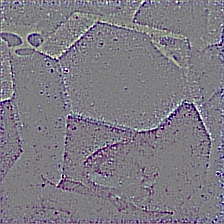

21


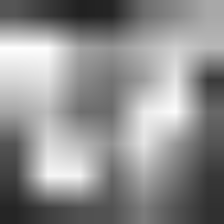

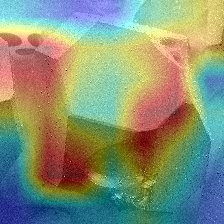

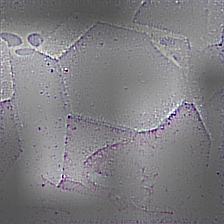

In [34]:
n = 12
print("> "+str(n))
image_path = Y_true_list[n]
image_code = str(n)
doCAM(image_path, image_code, dirs1)